In [1]:
import matplotlib.pyplot as plt
import matplotlib
import csv
from collections import Counter
from collections import defaultdict
import numpy as np
import matplotlib.ticker as plticker
import pandas as pd
import scipy.stats as stats
import inspect

import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()

/Users/verityhill/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
hex_codes = [
    "#618669",
    "#4E5E48",
    "#F1C081",
    "#C08A46",
    "#A83B17",
    "#862E19",
    "#62270C"
]

hex_codes.append("#C2A67E")
hex_codes.append("#86B790")

colours = [
    "#86B790",
    "#618669",
    "#4E5E48",
    "#F1C081",
    "#C08A46",
    "#C2A67E",
    "#A83B17",
    "#862E19",
    "#62270C"
]



In [3]:
year_to_sex = defaultdict(list)
year_to_age = defaultdict(list)
year_to_month = defaultdict(list)

northeast = ["CT", "NY", "MA", "ME", "NH", "VT", "RI"]

human_case_detail_arbonet = ""

with open(human_case_detail_arbonet) as f:
    data = csv.DictReader(f)
    for l in data:
        if l['state'] in northeast:
            year = int(l['year'])
            year_to_sex[year].append(l['sex'])
            year_to_month[year].append(l['month'])
            
            age_start = (l['age_group'].split(" ")[0])
            if age_start == "<1" or age_start == "1":
                age_start = 0
            elif age_start.endswith("5"):
                age_start = int(age_start) - 5
            else:
                age_start = int(age_start)
            
            year_to_age[year].append(age_start)
            

FileNotFoundError: [Errno 2] No such file or directory: ''

## Sex

In [4]:
sex_counts = defaultdict(dict)
sex_freqs = defaultdict(dict)

for year, sex_list in year_to_sex.items():
#     if len(sex_list) >= 3:
    counts = Counter(sex_list)
    props = {}
    for i,v in counts.items():
        props[i] = v/len(sex_list)

    sex_counts[year] = counts
    sex_freqs[year] = props
        


In [5]:
df_dict = defaultdict(list)
for k,v in sex_counts.items():
#     df_dict["year"].append(k)
    if "Male" in v:
        df_dict["men"].append(v["Male"])
    else:
        df_dict["men"].append(0)
        
    if "Female" in v:
        df_dict["women"].append(v["Female"])
    else:
        df_dict["women"].append(0)


df = pd.DataFrame(df_dict).to_numpy()
print(df)


stats = importr('stats')
res = stats.fisher_test(df)
res[0]

[]


R[write to console]: Error in (function (x, y = NULL, workspace = 2e+05, hybrid = FALSE, hybridPars = c(expect = 5,  : 
  'x' must have at least 2 rows and columns



RRuntimeError: Error in (function (x, y = NULL, workspace = 2e+05, hybrid = FALSE, hybridPars = c(expect = 5,  : 
  'x' must have at least 2 rows and columns


In [45]:
male = []
female = []
for year, props in sex_freqs.items():
    male.append(props["Male"])
    if "Female" in props:
        female.append(props["Female"])
    else:
        female.append(0)

male = np.array(male)
female = np.array(female)

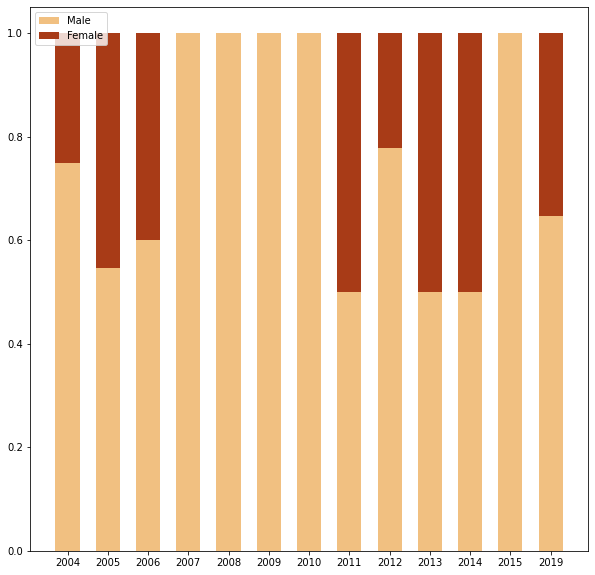

In [73]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

barwidth = 0.6

ax.bar([str(i) for i in sex_freqs.keys()], male, color="#F1C081", label="Male", width=barwidth)
ax.bar([str(i) for i in sex_freqs.keys()], female, bottom=male, color="#A83B17", label="Female", width=barwidth)

ax.legend(bbox_to_anchor=(1.23, 1.0))

# loc = plticker.MultipleLocator(base=2.0)
# ax.xaxis.set_major_locator(loc)

ax.legend()
ax.set_ylim(0,1.05)

plt.savefig("../../figures/supplementary/demographics_fig/sex_ratio.pdf", bbox_inches='tight')

plt.show()

## age group

In [4]:
age_props = defaultdict(dict)
age_counts = defaultdict(dict)
all_possible_ages = set()
for year, age_list in year_to_age.items():    
#     if len(age_list) >= 3:
    counts = Counter(age_list)
    props = {}
    for i,v in counts.items():
        props[i] = v/len(age_list)

    age_props[year] = props
    age_counts[year] = counts
    for i in age_list:
        all_possible_ages.add(i)

In [6]:
for k,v in age_props.items():
    biggest_group = max(v, key=v.get)
    print(k, biggest_group, v[biggest_group])

NameError: name 'age_props' is not defined

In [6]:
df_dict = defaultdict(list)

for year, age_group in age_props.items():
    df_dict["year"].append(year)
    for i in all_possible_ages:
        if i not in age_group:
            age_group[i] = 0
    sorted_groups = {k:v for k,v in sorted(age_group.items(), key=lambda x : x[0])}
    for age_group, freq in sorted_groups.items():
        df_dict[age_group].append(freq)
        
df = pd.DataFrame(df_dict)

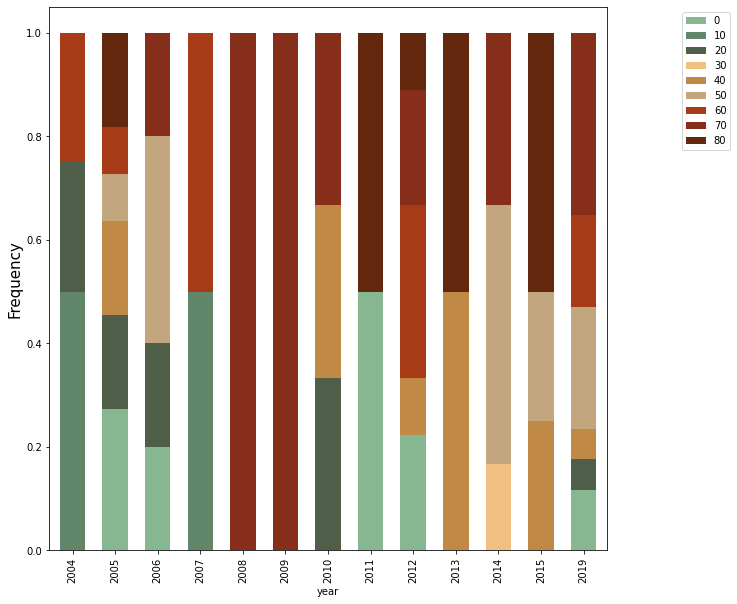

In [76]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

font = {'family' : 'normal',
        'size'   : 15}

df.plot(x='year', kind='bar', stacked=True, ax=ax, color=colours, width=0.6)

ax.legend(bbox_to_anchor=(1.23, 1.0))
ax.set_ylabel("Frequency", size=15)

plt.show()

In [72]:
stats = importr('stats')
inspect.getargspec(stats.fisher_test)

/var/folders/pd/bjtp4xt916vfpszlps7rr5_c0000gn/T/ipykernel_9462/3734069501.py:2: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  inspect.getargspec(stats.fisher_test)


ArgSpec(args=['self'], varargs='args', keywords='kwargs', defaults=None)

In [7]:
df_dict = defaultdict(list)
for k,v in age_counts.items():
    for age in sorted(all_possible_ages):
        if age in v:
            df_dict[age].append(v[age])
        else:
            df_dict[age].append(0)
            
df = pd.DataFrame(df_dict)




NameError: name 'age_counts' is not defined

In [ ]:
df = pd.DataFrame(df_dict).to_numpy()


stats = importr('stats')
res = stats.fisher_test(df, simulate_p_value=True)
res[0]

In [11]:
overall_cases = defaultdict(list)
with open("../../data/case_data/arbonet_cases_human.csv")as f:
    data = csv.DictReader(f)
    for l in data:
        if l['state'] in northeast:
            overall_cases[l['year']].append(int(l['count']))
    
large = []
small = []
for k,v in sorted(overall_cases.items()):
    if np.sum(v) >= 5:
        large.append(int(k))
    else:
        small.append(int(k))
                                             
print(large)
print(small)

[2004, 2005, 2006, 2012, 2014, 2019, 2020]
[2007, 2008, 2009, 2010, 2011, 2013, 2015]


In [8]:
large_dict = defaultdict(list)
small_dict = defaultdict(list)
for k,v in age_counts.items():
    if k in large:
        for age in sorted(all_possible_ages):
            if age in v:
                large_dict[age].append(v[age])
            else:
                large_dict[age].append(0)
                
    else:
        for age in sorted(all_possible_ages):
            if age in v:
                small_dict[age].append(v[age])
            else:
                small_dict[age].append(0)
                
df_dict = defaultdict(list)
for k,v in large_dict.items():
    df_dict["large"].append(sum(v))
for k,v in small_dict.items():
    df_dict['small'].append(sum(v))

print(large_dict)
    
df = pd.DataFrame(df_dict).to_numpy()
print(df)

stats = importr('stats')
res = stats.fisher_test(df, simulate_p_value=True)
res[0]


NameError: name 'age_counts' is not defined

## Timing

In [16]:
month_freqs = defaultdict(dict)
for year, month_list in year_to_month.items():
    if len(month_list) >= 3:
        counts = Counter(month_list)
        props = {}
        for i,v in counts.items():
            props[int(i)] = v/len(month_list)

        month_freqs[year] = props
        


In [17]:
df_dict = defaultdict(list)

for year, month_group in month_freqs.items():
    df_dict["year"].append(year)
    for i in [7,8,9,10]:
        if i not in month_group:
            month_group[i] = 0
    sorted_groups = {k:v for k,v in sorted(month_group.items(), key=lambda x : x[0])}
    for month_group, freq in sorted_groups.items():
        df_dict[month_group].append(freq)
        
df = pd.DataFrame(df_dict)


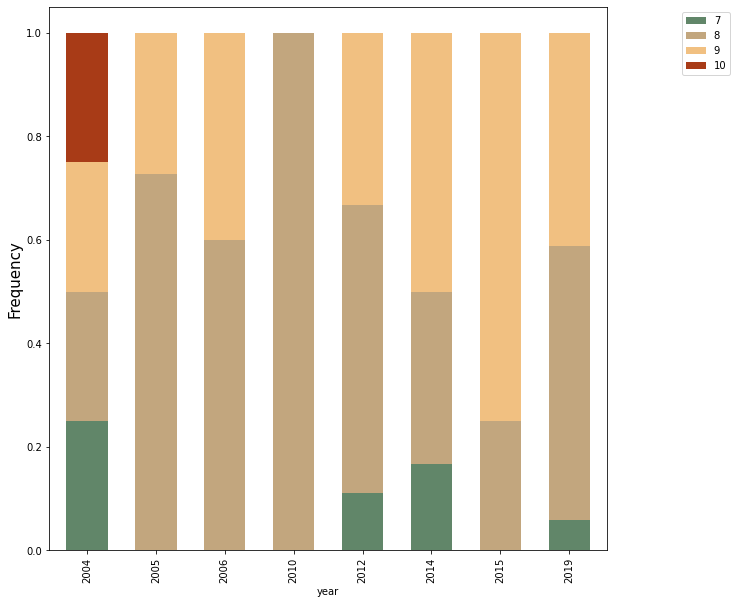

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

font = {'family' : 'normal',
        'size'   : 15}

colours = ["#618669", "#C2A67E","#F1C081",
    "#A83B17",]

df.plot(x='year', kind='bar', stacked=True, ax=ax, color=colours, width=0.6)

ax.legend(bbox_to_anchor=(1.23, 1.0))
ax.set_ylabel("Frequency", size=15)

plt.savefig("../../figures/figure_5/timing.pdf", bbox_inches="tight")

plt.show()